# **Exchange Rate**
#### 환율 관련 데이터로써 *ISO Code, 기준일, 통화 가격과 USD의 비율* 을 제공
#### 그냥 국가별 환율에 대한 정보(쉽게 말해)
## 활용할 수 있을만한거(Chat GPT + 내 의견)
#### 1. 환율과 다른 자산의 상관관계를 파악하기 위해 사용?
#### 2. 통화 헤지를 사용해서 포트폴리오를 환율 변동으로부터 보호?
#### 3. 환율을 포트폴리오에 직접 구성?

In [29]:
%%time
# Data load
# ISOCode: 통화 코드(예, 미국: USD, 한국:KRW 등)
# priceClose: USD와의 비율
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

parquet_file = '/Users/cho/Desktop/대학원/Jupyter/S&P/Data/exchangerate.parquet'
er = pd.read_parquet(parquet_file)
er

CPU times: user 210 ms, sys: 29.4 ms, total: 239 ms
Wall time: 216 ms


,ISOCode,priceDate,priceClose
0,PTE,2021-03-20,178.318715000
1,ROL,2021-03-20,25789.000000000
2,SDD,2021-03-20,203.090000000
3,SIT,2021-03-20,213.147798000
4,SKK,2021-03-20,26.795571000
...,...,...,...
494831,BZD,2018-08-17,2.015300000
494832,BZD,2018-08-18,2.015300000
494833,BZD,2018-08-19,2.015300000
494834,BZD,2018-08-20,2.015300000


In [30]:
# 통화가 너무 많으니 한국, 일본, 유로의 비율만 비교
# 미국 기준 비율을 측정하니 미국은 볼 필요가 없음

er['ISOCode'].unique()

array(['PTE', 'ROL', 'SDD', 'SIT', 'SKK', 'SRG', 'STD', 'TRL', 'USD',
       'VEB', 'XEU', 'YUM', 'ZMK', 'ZWD', 'VEF', 'ZWL', 'USX', 'KGS',
       'LTL', 'LUF', 'LVL', 'MGF', 'MRO', 'MTL', 'MZM', 'NLG', 'ATS',
       'AZM', 'BEF', 'BYR', 'CYP', 'DDM', 'DEM', 'ECS', 'EEK', 'ESP',
       'FIM', 'FRF', 'GHC', 'GRD', 'IEP', 'ITL', 'HNL', 'HRK', 'HTG',
       'HUF', 'IDR', 'ILS', 'INR', 'IQD', 'IRR', 'ISK', 'JMD', 'JOD',
       'JPY', 'KES', 'KHR', 'KMF', 'KPW', 'KRW', 'KWD', 'KYD', 'KZT',
       'LAK', 'LBP', 'LKR', 'LRD', 'LSL', 'LYD', 'MAD', 'MDL', 'MKD',
       'MMK', 'MNT', 'MOP', 'MUR', 'MVR', 'MWK', 'MXN', 'MYR', 'NAD',
       'NGN', 'NIO', 'NOK', 'NPR', 'NZD', 'OMR', 'PAB', 'PEN', 'PGK',
       'PHP', 'PKR', 'PLN', 'PYG', 'QAR', 'RUB', 'RWF', 'SAR', 'SBD',
       'SCR', 'SEK', 'SGD', 'SHP', 'SLL', 'SOS', 'SVC', 'SYP', 'SZL',
       'THB', 'TND', 'TOP', 'TTD', 'TWD', 'TZS', 'UAH', 'UGX', 'UYU',
       'UZS', 'VND', 'VUV', 'WST', 'XCD', 'XDR', 'XOF', 'XPF', 'YER',
       'ZAR', 'BAM',

In [45]:
eur = er[er['ISOCode']=='EUR']
eur = eur.sort_values(by='priceDate')
eur['priceClose'] = eur['priceClose'].astype(float)

krw = er[er['ISOCode']=='KRW']
krw = krw.sort_values(by='priceDate')
krw['priceClose'] = krw['priceClose'].astype(float)

jpy = er[er['ISOCode']=='JPY']
jpy = jpy.sort_values(by='priceDate')
jpy['priceClose'] = jpy['priceClose'].astype(float)

In [55]:
krw['priceClose']

313821    1203.89
313822    1206.97
313823    1208.70
313824    1197.23
313825    1182.03
           ...   
277441    1344.08
277272    1344.08
277146    1350.74
276937    1344.33
276604    1344.33
Name: priceClose, Length: 2475, dtype: float64

In [58]:
np.log(krw['priceClose'])

313821    7.093313
313822    7.095868
313823    7.097301
313824    7.087766
313825    7.074989
            ...   
277441    7.203465
277272    7.203465
277146    7.208408
276937    7.203651
276604    7.203651
Name: priceClose, Length: 2475, dtype: float64

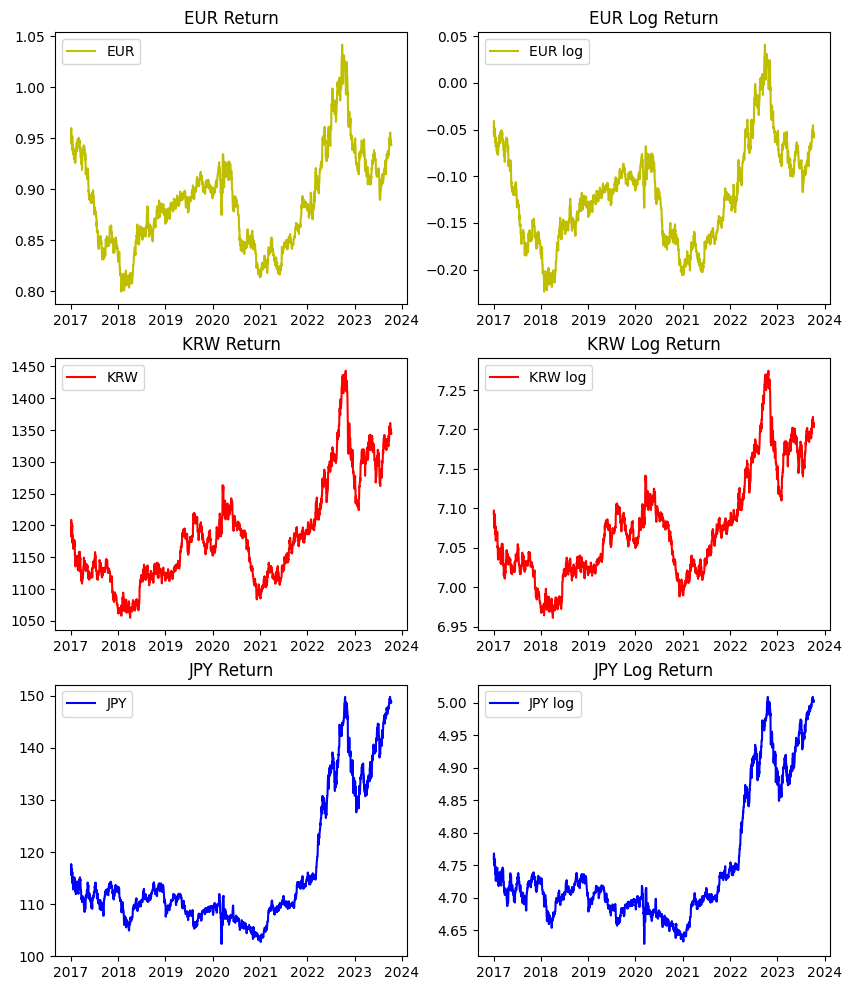

In [64]:
plt.figure(figsize=(10, 12))

plt.subplot(3,2,1)
plt.plot(eur['priceDate'], eur['priceClose'], color='y', label='EUR')
plt.title('EUR Return')
plt.legend(loc='best')

plt.subplot(3,2,2)
plt.plot(eur['priceDate'], np.log(eur['priceClose']), color='y', label='EUR log')
plt.title('EUR Log Return')
plt.legend(loc='best')

plt.subplot(3,2,3)
plt.plot(krw['priceDate'], krw['priceClose'], color='r', label='KRW')
plt.title('KRW Return')
plt.legend(loc='best')

plt.subplot(3,2,4)
plt.plot(krw['priceDate'], np.log(krw['priceClose']), color='r', label='KRW log')
plt.title('KRW Log Return')
plt.legend(loc='best')

plt.subplot(3,2,5)
plt.plot(jpy['priceDate'], jpy['priceClose'], color='b', label='JPY')
plt.title('JPY Return')
plt.legend(loc='best')

plt.subplot(3,2,6)
plt.plot(jpy['priceDate'], np.log(jpy['priceClose']), color='b', label='JPY log')
plt.title('JPY Log Return')
plt.legend(loc='best')


plt.show()

# **Key Developments**
#### 시장 가치에 영향을 줄 수 있는 뉴스와 사건에 대한 요약이 담겨있는 데이터
#### companyName, Headline(이벤트 헤드라인), Situation(이벤트 추가 설명), announcedDate(이벤트 발생 날짜), 이벤트 유형으로 의미있는 분석 가능할 것 같음

## 활용할 수 있을만한거(Chat GPT + 내 의견)
#### 1. 이벤트 유형을 카테고리로 분류 후 빈도를 분석해서 이벤트 유형이 주가 또는 시장에 미치는 영향 파악 v
#### 2. 감성분석을 통해 특정 이벤트가 주가에 미치는 영향
#### 3. 이벤트 발생 날짜와 주가를 연결하여 주가에 미치는 영향 분석? 상관관계?
#### 4. 이벤트 설명에서 특정 키워드를 추출해서 주가에 미치는 영향?

#### 추가: 아마존의 실적 발표일 이후 주가 변동을 시각화 해보았음. 실적 발표 후 상승 또는 하락이 눈에 띄게 일어난다는 점을 발견


In [72]:
parquet_file = '/Users/cho/Desktop/대학원/Jupyter/S&P/Data/keydev.parquet'
dev = pd.read_parquet(parquet_file)
dev.head()

,companyId,companyName,keyDevId,headline,situation,announcedDate,mostImportantDateUTC,keyDevEventTypeName
0,18501,21 Invest Sgr S.p.A.,1786391818,A&M Capital Europe acquired Carton Pack Srl fr...,A&M Capital Europe agreed to acquire Carton Pa...,2022-04-21 00:00:00,2022-04-21 00:00:00,M&A Transaction Closings
1,18501,21 Invest Sgr S.p.A.,1775873359,A&M Capital Europe agreed to acquire Carton Pa...,A&M Capital Europe agreed to acquire Carton Pa...,2022-03-11 00:00:00,2022-03-11 00:00:00,M&A Transaction Announcements
2,18511,3i Group plc,1856147393,3i Group plc - Special Call,3i Group plc - Special Call,2023-09-20 06:00:00,2023-09-20 13:00:00,Special Calls
3,18511,3i Group plc,1846370061,3i Group plc Approves Dividend,3i Group plc at its Annual General Meeting hel...,2023-06-29 14:30:00,2023-06-29 14:30:00,Dividend Increases
4,18511,3i Group plc,1843429491,"3i Group plc to Report Q1, 2024 Results on Jul...",3i Group plc announced that they will report Q...,2023-06-16 00:00:00,2023-07-20 00:00:00,Earnings Release Date


In [73]:
dev.drop(['keyDevId'], axis=1, inplace=True)

In [77]:
dev

,companyId,companyName,headline,situation,announcedDate,mostImportantDateUTC,keyDevEventTypeName
0,18501,21 Invest Sgr S.p.A.,A&M Capital Europe acquired Carton Pack Srl fr...,A&M Capital Europe agreed to acquire Carton Pa...,2022-04-21 00:00:00,2022-04-21 00:00:00,M&A Transaction Closings
1,18501,21 Invest Sgr S.p.A.,A&M Capital Europe agreed to acquire Carton Pa...,A&M Capital Europe agreed to acquire Carton Pa...,2022-03-11 00:00:00,2022-03-11 00:00:00,M&A Transaction Announcements
2,18511,3i Group plc,3i Group plc - Special Call,3i Group plc - Special Call,2023-09-20 06:00:00,2023-09-20 13:00:00,Special Calls
3,18511,3i Group plc,3i Group plc Approves Dividend,3i Group plc at its Annual General Meeting hel...,2023-06-29 14:30:00,2023-06-29 14:30:00,Dividend Increases
4,18511,3i Group plc,"3i Group plc to Report Q1, 2024 Results on Jul...",3i Group plc announced that they will report Q...,2023-06-16 00:00:00,2023-07-20 00:00:00,Earnings Release Date
...,...,...,...,...,...,...,...
3244073,2147481077,"Centennial Emergency Physicians, LLC",Joint Reorganization Plan and Disclosure State...,"Envision Healthcare Corporation, along with it...",2023-06-29 00:00:00,2023-06-29 04:00:00,Bankruptcy – Reorganization
3244074,2147481077,"Centennial Emergency Physicians, LLC",Motion for De Minimis Asset Sale Filed by Envi...,Envision Healthcare Corporation filed a motion...,2023-05-31 00:00:00,2023-05-31 04:00:00,Bankruptcy – Asset Sale/Liquidation
3244075,2147481077,"Centennial Emergency Physicians, LLC",Motion for Joint Administration Approved for E...,The US Bankruptcy Court granted an order for t...,2023-05-15 00:00:00,2023-05-15 04:00:00,Bankruptcy - Other
3244076,2147481077,"Centennial Emergency Physicians, LLC",Envision Healthcare Corporation Filed for Bank...,"Envision Healthcare Corporation, along with it...",2023-05-15 00:00:00,2023-05-15 04:00:00,Bankruptcy - Filing


In [80]:
dev['keyDevEventTypeName'].unique()

array(['M&A Transaction Closings', 'M&A Transaction Announcements',
       'Special Calls', 'Dividend Increases', 'Earnings Release Date',
       'Fixed Income Offerings', 'Annual General Meeting',
       'Announcements of Earnings', 'Ex-Div Date (Regular)',
       'Earnings Calls', 'Company Conference Presentations',
       'Conferences', 'Seeking Acquisitions/Investments',
       'Private Placements', 'Executive/Board Changes - Other',
       'Executive Changes - CFO', 'M&A Rumors and Discussions',
       'Client Announcements', 'Buyback Tranche Update',
       'Corporate Guidance - New/Confirmed', 'Business Expansions',
       'Delistings', 'Buyback Transaction Announcements',
       'Buyback Transaction Closings', 'Product-Related Announcements',
       'Changes in Company Bylaws/Rules', 'Shareholder/Analyst Calls',
       'Index Constituent Adds', 'Index Constituent Drops',
       'Strategic Alliances', 'Spin-Off/Split-Off',
       'Seeking Financing/Partners',
       'Special/Ext

In [114]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

ex_dev = dev[dev['keyDevEventTypeName'] == 'Estimated Earnings Release Date (S&P Global Derived)']
ex_dev[ex_dev['companyId'] == 18749]

,companyId,companyName,headline,situation,announcedDate,mostImportantDateUTC,keyDevEventTypeName
1650,18749,"Amazon.com, Inc.","Amazon.com, Inc. expected to report Q2 2023 results on August 3, 2023.","Amazon.com, Inc. expected to report Q2 2023 results on August 3, 2023. This event was calculated by S&P Global (Created on July 20, 2023).",2023-04-28,2023-08-03 00:00:00,Estimated Earnings Release Date (S&P Global Derived)
1719,18749,"Amazon.com, Inc.","Amazon.com, Inc. expected to report Q1 2023 results on April 27, 2023.","Amazon.com, Inc. expected to report Q1 2023 results on April 27, 2023. This event was calculated by S&P Global (Created on April 13, 2023).",2023-02-03,2023-04-27 00:00:00,Estimated Earnings Release Date (S&P Global Derived)
1761,18749,"Amazon.com, Inc.","Amazon.com, Inc. expected to report Q4 2022 results on February 2, 2023.","Amazon.com, Inc. expected to report Q4 2022 results on February 2, 2023. This event was calculated by S&P Global (Created on January 19, 2023).",2022-11-21,2023-02-02 05:00:00,Estimated Earnings Release Date (S&P Global Derived)


In [127]:
amzn_df = ex_dev[ex_dev['companyId'] == 18749]
amzn_df['mostImportantDateUTC'][1:2]

1719   2023-04-27
Name: mostImportantDateUTC, dtype: datetime64[ns]

In [94]:
import pandas_datareader.data as pdr
import yfinance as yf

yf.pdr_override() 

In [115]:
amzn1 = pdr.get_data_yahoo('AMZN', start='2023-07-26', end='2023-08-10')

[*********************100%%**********************]  1 of 1 completed


In [116]:
amzn2 = pdr.get_data_yahoo('AMZN', start='2023-04-20', end='2023-05-04')

[*********************100%%**********************]  1 of 1 completed


In [117]:
amzn3 = pdr.get_data_yahoo('AMZN', start='2023-01-25', end='2023-02-09')

[*********************100%%**********************]  1 of 1 completed


In [144]:
a = amzn_df['mostImportantDateUTC'][:1]
a

,companyId,companyName,headline,situation,announcedDate,mostImportantDateUTC,keyDevEventTypeName
1650,18749,"Amazon.com, Inc.","Amazon.com, Inc. expected to report Q2 2023 results on August 3, 2023.","Amazon.com, Inc. expected to report Q2 2023 results on August 3, 2023. This event was calculated by S&P Global (Created on July 20, 2023).",2023-04-28,2023-08-03 00:00:00,Estimated Earnings Release Date (S&P Global Derived)
1719,18749,"Amazon.com, Inc.","Amazon.com, Inc. expected to report Q1 2023 results on April 27, 2023.","Amazon.com, Inc. expected to report Q1 2023 results on April 27, 2023. This event was calculated by S&P Global (Created on April 13, 2023).",2023-02-03,2023-04-27 00:00:00,Estimated Earnings Release Date (S&P Global Derived)
1761,18749,"Amazon.com, Inc.","Amazon.com, Inc. expected to report Q4 2022 results on February 2, 2023.","Amazon.com, Inc. expected to report Q4 2022 results on February 2, 2023. This event was calculated by S&P Global (Created on January 19, 2023).",2022-11-21,2023-02-02 05:00:00,Estimated Earnings Release Date (S&P Global Derived)


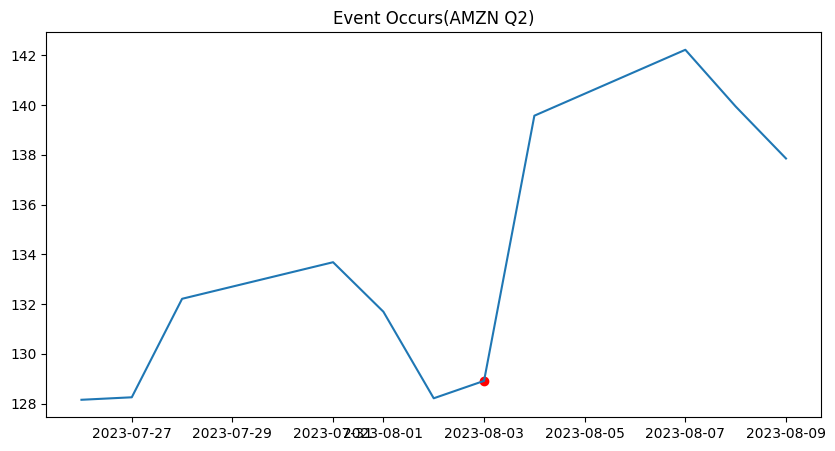

In [158]:
plt.figure(figsize=(10,5))

plt.title('Event Occurs(AMZN Q2)')
plt.plot(amzn1.index, amzn1['Adj Close'])
plt.scatter(amzn_df['mostImportantDateUTC'][:1], amzn1.loc[amzn_df['mostImportantDateUTC'][:1], 
            'Adj Close'], color = 'r')

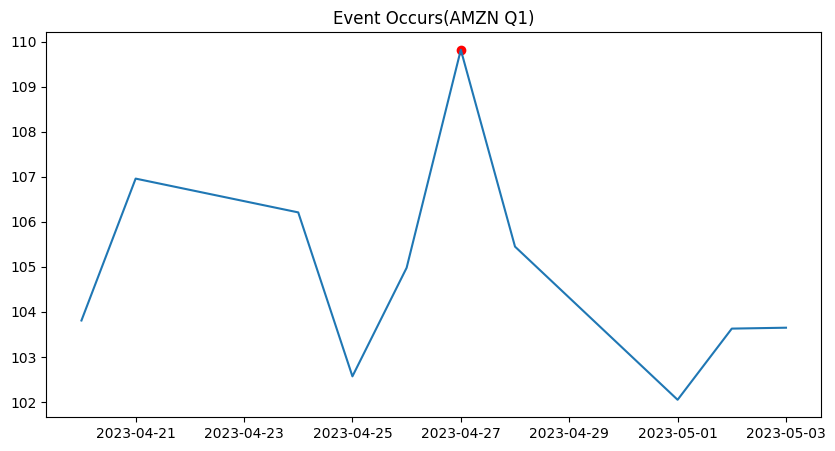

In [157]:
plt.figure(figsize=(10,5))

plt.title('Event Occurs(AMZN Q1)')
plt.plot(amzn2.index, amzn2['Adj Close'])
plt.scatter(amzn_df['mostImportantDateUTC'][1:2], amzn2.loc[amzn_df['mostImportantDateUTC'][1:2], 
            'Adj Close'], color = 'r')

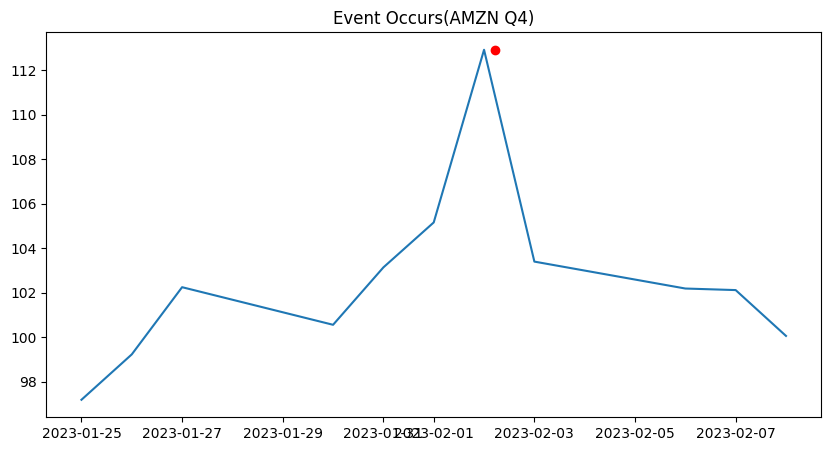

In [170]:
plt.figure(figsize=(10,5))

plt.title('Event Occurs(AMZN Q4)')
plt.plot(amzn3.index, amzn3['Adj Close'])
plt.scatter(amzn_df['mostImportantDateUTC'][2:3], amzn3.loc['2023-02-02', 'Adj Close'], color = 'r')